# ECE 570 Assignment 1 Instructions

## **Instructions**
This Jupyter notebook document entitled **Assignment_01_Instructions** contains instructions for doing your assignment exercise.
A second Jupyter notebook document entited **Assignment_01_Exercise** contains all the exercises that you will need to perform.

As you read each section of this instruction, you should try running the associated code snippets. 
The colaboratory environment allows you to run code snippets locally by clicking on the arrow on the left of the code. This is a wonderful feature that allows you to experiment as you read. You should take advantage of this and experiment and test different ideas, so you can become more familiar with the Python and the Jupyter programing environment. 

At the end of each sub-section, there will be exercises to perform. 
You should perform the exercises in the document **Assignment_01_Exercise**, which will contain all your results. 
You can then hand in your results by printing the **Assignment_01_Exercise** document as a pdf with all code and simulation results included.

## Section 1: Introduction to Python

This section introduces basic Python semantics. The goal is to recap some important features in Python.


### Basics
The most frequently used native python structure is the list. A list in python have lots of useful properties. For example：


In [4]:
A = [1,2,3,4]

print(f'The length of A is {len(A)}')     # Length of A
print(f'A*3 prints to {A*3}')          # List multiplication
print(f'A+A prints to {A+A}')          # List concatanation
A.append('end')                   # List appendation
print(f'A appends a string gives {A}')

The length of A is 4
A*3 prints to [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
A+A prints to [1, 2, 3, 4, 1, 2, 3, 4]
A appends a string gives [1, 2, 3, 4, 'end']


**Important**: Python is a **0 index** language, which means all indices start at 0 (unlike in Matlab which starts at "1").

In [2]:
# Python                 
A = [0,1,2,3,4]         
first = A[0]        # 0 indexing
last = A[-1]        # nagative indexing
print(f'first element is {first}, last element is {last}')

first element is 0, last element is 4


Moreover, lists are also iterable which is very useful in loops.

In [3]:
print('elements in A are:', end=' ')    # note the end parameter is '\n'(new line) by default
for item in A:
  print(item, end=' ')

elements in A are: 0 1 2 3 4 

#### Exercise 1.1:
Perform Exercise 1.1 in Jupyter notebook document **Assignment_01_Exercise**.



---



# Section 2: Introduction to data science packages
For this class, we will mainly use these two packages to help visualize data.
*   Numpy - Matrix processing package
*   Matplotlib - Data visualization package





In [5]:
import numpy as np                # import the numpy packages and use the shorter name "np"
import matplotlib.pyplot as plt          # import matplotlib's pyplot package using the alias "plt"

In [ ]:
# An array can be initialized from a list with all numbers.
A = [0,1,2,3,4,5]
A = np.array(A, dtype='int32')
print(f'A: {A} which has the type {A.dtype}')

# Other ways to initialize a numpy array
A = np.zeros(5, dtype='float')          # initialize all elements zero
print(f'A: {A} which has the type {A.dtype}')
A = np.random.randint(low=0, high=10, size=5)  # initialize elements with random integer [0,10]
print(f'A: {A} which has the type {A.dtype}')

A: [0 1 2 3 4 5] which has the type int32
A: [0. 0. 0. 0. 0.] which has the type float64
A: [6 4 6 7 2] which has the type int64


In [7]:
A = np.array([0,1,2,3,4,5])
print(f'A is {A}')

# Get the shape of the array
print(f'A has the shape {A.shape}')

# Array logic indexing
print(f'A[A>2] is {A[A>2]}')

# Array slicing
print(f'A[:3] is {A[:3]}')
print(f'A[-3:] is {A[-3:]}')

# Array reshaping
AA = A.reshape(3,-1)  # Note -1 here is not an indication for the numbers of dimension, just a special symbol that tells numpy to auto-compute the dimension.
print(f'A after reshaping {A} and the shape is {A.shape}')

A is [0 1 2 3 4 5]
A has the shape (6,)
A[A>2] is [3 4 5]
A[:3] is [0 1 2]
A[-3:] is [3 4 5]
A after reshaping [0 1 2 3 4 5] and the shape is (6,)


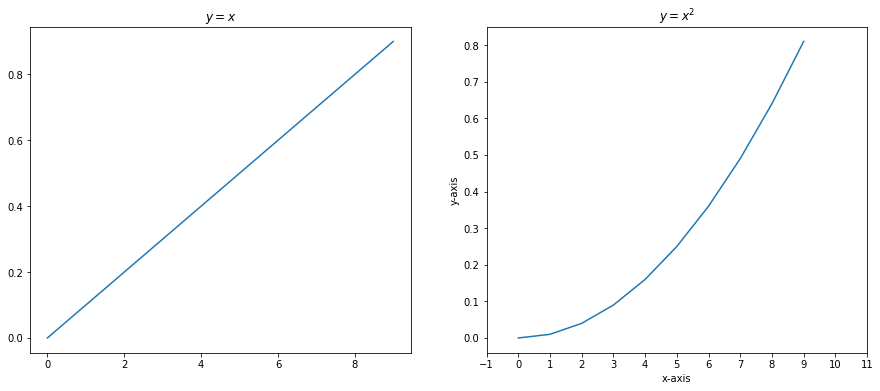

In [8]:
Y = np.arange(0,1,0.1)          # initiailize using the arrange() function 
X = range(len(Y))

plt.figure(figsize=(15,6))         # Create a figure with size 15 by 6
plt.subplot(121)              # Subplot figure 1X2
plt.plot(X,Y)               # Plot Y w.r.t X
plt.title('$y=x$')             # Give the current subplot a title which can be typed in Latex form
plt.subplot(122)
plt.plot(X,Y**2)
plt.title('$y=x^2$')
plt.xlim(-1,11)              # Setting up the visual range for x-axis
plt.xticks(range(-1,12))          # Specify the ticks on the x-axis
plt.xlabel('x-axis')            # give x label a name
plt.ylabel('y-axis')            # give y label a name

plt.show()

There also exists Python packages for neural networks and deep learning. Here are some popular packages:

*   TensorFlow (Google)
*   Pytorch (Facebook)
*   Keras (François Chollet)
*   Caffe (Berkeley)

We will use some of these in later assignments.

#### Exercise 1.2
Perform Exercise 1.2 in Jupyter notebook document **Assignment_01_Exercise**.

# Section 3: A PCA algorithm for a sparse data matrix

In the next exercise, your task will be to find the first principal component vector of a **sparse matrix** (sparse data matrices are very useful but must be handled carefully to avoid extra computation as we will see).
Finding the first principal component is equivalent to finding the the top right singular vector of a zero-meaned data matrix (or equivalently the top eigenvector of $X_c^T X_c$).
In particular, we will use the [power iteration](https://en.wikipedia.org/wiki/Power_iteration) method as it only requires simple matrix vector and vector vector multiplications.
In order to accomplish this, we first construct the power iteration algorithm for our sparse matrix $X$ ：
>Input: $X\in \cal{R}^{n \times p}$ (sparse matrix)   
>Output: $v_1$ (top right singular vector of centered matrix)   
> 
>$\mu = \frac{1}{n}\sum_{i=1}^n x_i$  
>$v^{(0)} \sim \text{Normal}(0,I)$  
> 
>For $i=1$ to $K$ iterations  
>$\quad\quad v = (X-\mu \mathbb{1}^T)^T (X-\mu \mathbb{1}^T)v^{(i-1)}$  
>$\quad\quad v^{(i)} = \frac{v}{\|v\|_2}$  
>Return $v^{(i)}$  

Notice that $\mu$ is the mean vector of $X$ and $\mathbb{1}$ is the column vector of all one's, i.e., $\mathbb{1}=[1,1,1,\cdots,1]^T$). Thus, $X_c = (X-\mu\mathbb{1}^T)$ is the centered data matrix where the mean is subtracted from every row.  This centering step is critical for performing PCA correctly via SVD. 

### Efficient computation of algorithm for sparse matrices
The algorithm so far is mathematically well defined. However, notice the step
>$v = (X-\mu \mathbb{1}^T)^T (X-\mu \mathbb{1}^T)v^{(i-1)}$

This is not favorable in the sense that the matrix $X$ is sparse.  If the operations are performed in the order defined by the parenthesis, then the intermediate computation $(X-\mu \mathbb{1}^T)$ will not be sparse (i.e., because of the mean $\mu$ is not sparse, the resulting matrix will no longer be sparse.
This will destroy the benefit of using sparse matrices.
Therefore, instead of computing the vector $v$ like above, we can rearrange the computation for the above equation to achieve at the following new equation based on properties of matrix products (a good exercise is to derive this reordering yourself):
>$v = X^T X v^{(i-1)} - \mathbb{1}\mu^TXv^{(i-1)} - X^T\mu\mathbb{1}^T v^{(i-1)} + \mathbb{1} \mu^T \mu \mathbb{1}^T v^{(i-1)}$  
>$\hphantom{v} = X^T(X v^{(i-1)}) - \mathbb{1}(\mu^T(Xv^{(i-1)})) - (X^T\mu)(\mathbb{1}^T v^{(i-1)}) + \mathbb{1} (\mu^T \mu) (\mathbb{1}^T v^{(i-1)})$

The parenthesis on the second line show which computations should be computed first.
In this way, we only need to compute multiplications between a sparse matrix and a vector (e.g., $Xv_k$ or $X^T \mu$), which is much faster than dense matrix computations.
Also, we never need to form an intermediate dense matrices (e.g., $(X-\mu \mathbb{1}^T)$ or $(X^T X)$). 
This demonstrates that while the mathematics may be the same for an abstract algorithm, the order of computation matters significantly when implemented on the computer.

#### Exercise 1.3
Perform Exercise 1.3 in Jupyter notebook document **Assignment_01_Exercise**.

# Appendix: Other useful Python/Numpy tips (Highly recommended for reading)

### Important Tip: Whenever possible, avoid using `range` or indices like `i` and `j` for loops
Using `range` or indices is very prone to error when looping over lists/arrays or any other list-like object (though common in other languages such as C++ or Matlab.
Thus, I suggest avoiding using indices for looping (unless you just want to print out the list number for debugging purposes, look up the Python function `enumerate`).
One usual exception to this is for doing multiple iterations of an algorithm.

Instead, use Python's simple iterator interface to loop over lists or arrays.  You should be able to find tutorials online that explain python iterators and the for loop in more detail.

### `zip(a,b,...)` can be very useful for iterating over multiple lists that correspond to each other
**Note:** `zip` will only match elements up to the **shortest** iterable. For example `zip([1,2], ['a'])` will only produce one item `(1,a)` since the second list only has one item.

In [9]:
num_arr = 10*np.arange(10)
char_list = ['a','b','c','d']

for n, c in zip(num_arr, char_list):
    print('n=', n, 'c=', c)
    
for n, c, xvec in zip(num_arr, char_list, X):
    print('n=', n, 'c=', c, 'xvec=', xvec)

n= 0 c= a
n= 10 c= b
n= 20 c= c
n= 30 c= d
n= 0 c= a xvec= 0
n= 10 c= b xvec= 1
n= 20 c= c xvec= 2
n= 30 c= d xvec= 3


In [ ]:
# Loop through first 10 x-y pairs
x = np.arange(0,2,0.1)
y = x**2

for xx, yy in zip(x[:10], y[:10]):
  print('x=', xx, 'y=', yy)

print('Note: Here tells you the rounding error for numpy operations')

x= 0.0 y= 0.0
x= 0.1 y= 0.010000000000000002
x= 0.2 y= 0.04000000000000001
x= 0.30000000000000004 y= 0.09000000000000002
x= 0.4 y= 0.16000000000000003
x= 0.5 y= 0.25
x= 0.6000000000000001 y= 0.3600000000000001
x= 0.7000000000000001 y= 0.4900000000000001
x= 0.8 y= 0.6400000000000001
x= 0.9 y= 0.81
Note: Here tells you the rounding error for numpy operations


### _List Comprehensions_ are also very useful and include MAP and FILTER operations

- Suppose you want to map a list of numbers to a list of strings
- Suppose you only want to map odd numbers
- Syntax `[<expression> for <item> in <iterable> if <condition>]`

In [ ]:
num_list = [1, 2, 3, 4, 5]
str_list = []
for i in range(len(num_list)):
    str_list.append('Num:' + str(num_list[i]))
print('With index loops')
print(str_list)

# Use iterators
str_list = []
for n in num_list:
    str_list.append('Num:' + str(n))
print('With iterator loops')
print(str_list)

# Use list comprehension
str_list = ['Num:' + str(n) for n in num_list]
print('With list comprehension')
print(str_list)

# Use list comprehension
str_list = ['Num:' + str(n) for n in num_list if np.mod(n, 2) == 1]
print('Odd numbers only with list comprehension')
print(str_list)

With index loops
['Num:1', 'Num:2', 'Num:3', 'Num:4', 'Num:5']
With iterator loops
['Num:1', 'Num:2', 'Num:3', 'Num:4', 'Num:5']
With list comprehension
['Num:1', 'Num:2', 'Num:3', 'Num:4', 'Num:5']
Odd numbers only with list comprehension
['Num:1', 'Num:3', 'Num:5']


### Numpy reduction functions
- Numpy includes many useful **reduction** functions such as `np.sum`, `np.mean`, `np.prod`, `np.min`, `np.max`, etc.
- The `axis` argument is important and is interpreted as follows:
  1. If no axis argument, then just apply to all numbers in all dimensions.
  2. If axis argument given, then apply the reduction along that dimension and leave other dimensions alone.

In [ ]:
A = np.arange(3*4).reshape(3, 4)
print(A)

print('With no argument, it is the total sum', np.sum(A))
print('With axis=0, it sums along the first dimension (i.e. along the rows)')
print(np.sum(A, axis=0))
print('With axis=1, it sums along the second dimension (i.e. along the columns)')
print(np.sum(A, axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
With no argument, it is the total sum 66
With axis=0, it sums along the first dimension (i.e. along the rows)
[12 15 18 21]
With axis=1, it sums along the second dimension (i.e. along the columns)
[ 6 22 38]
